### Student Information
Name:卓鈺博

Student ID:113033624

GitHub ID:Paul901003

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

c:\python\dataMininig\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import library
import pandas as pd
import numpy as np

import nltk

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer

import plotly as py
import math
import PAMI

import umap
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [5]:
#轉成dataframe
df = pd.DataFrame(
    {"sentiment":ds["train"]["sentiment"],
     "comment":ds["train"]["comment"]})
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


Exercise 1

In [6]:
for text in df.comment[:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


Exercise 2

In [7]:
df[(df['sentiment'] == 'nostalgia') & (df['comment'].str.contains('song'))]

,sentiment,comment
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
11,nostalgia,this song came out my senior year in high scho...
13,nostalgia,I am 47 and grew up on songs of this type. I ...
...,...,...
1482,nostalgia,"Love the song, brings me back to a better plac..."
1484,nostalgia,My dad always played this song for mom when i ...
1487,nostalgia,I really love this song. My dad always turns 6...
1492,nostalgia,i used to cry over this song cause i had a boy...


Exercise 3

In [8]:
df[df['sentiment'] == 'nostalgia'].iloc[::10][0:5]

,sentiment,comment
1,nostalgia,The mist beautiful voice ever I listened to hi...
18,nostalgia,"My Grandparents had a pub in the 1970's, this ..."
32,nostalgia,I remember my Mom listening to Jim over and ov...
50,nostalgia,"If I remember correctly, this song came out af..."
71,nostalgia,Gosh does this bring back memories. Nearly eve...


In [9]:
# Missing Values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


Exercise 4

In [10]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

Dealing with Duplicate Data

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [12]:
print(f'sum of duplicated data before drop : {sum(df.duplicated())}')
print(f"sum of duplicated comment before drop : {sum(df.duplicated('comment'))}")
print(f'length before drop : {len(df)}')

sum of duplicated data before drop : 1
sum of duplicated comment before drop : 1
length before drop : 1500


In [13]:
df.drop_duplicates(keep=False, inplace=True)
print(f'sum of duplicated data after drop : {sum(df.duplicated())}')
print(f"sum of duplicated comment after drop : {sum(df.duplicated('comment'))}")
print(f'length after drop : {len(df)}')

sum of duplicated data after drop : 0
sum of duplicated comment after drop : 0
length after drop : 1498


Exercise 6

In [14]:
df_sample = df.sample(n=1000)
print(len(df_sample))
df_sample[0:4]

1000


,sentiment,comment
1273,not nostalgia,Sad that he looks like a typical middle-aged g...
216,not nostalgia,Elvis must have stolen James Burton from Ricke...
394,nostalgia,Remembering my mom dancing to this song in our...
921,nostalgia,Looking back on how it was in years gone by. ...


In [15]:
print(f"df length: {len(df)}")
print(f"Sampled df length: {len(df_sample)}")

# 是否有重複採樣
print('--')
print(sum(df.duplicated()))
print('--')
print(sum(df.duplicated('comment')))

print("原始數據分布:")
print(df['sentiment'].value_counts())

print("\n採樣數據分布:")
print(df_sample['sentiment'].value_counts())

vectorizer = CountVectorizer()
df_counts = vectorizer.fit_transform(df['comment'])
df_sample_counts = vectorizer.transform(df_sample['comment'])

# 詞的出現頻率
original_word_counts = df_counts.sum(axis=0)
sample_word_counts = df_sample_counts.sum(axis=0)

print("原始數據集語詞出現頻率：")
print(df_counts.sum(axis=0))

print("\n採樣數據集語詞出現頻率：")
print(df_sample_counts.sum(axis=0))

print("觀察以上結果可以發現")
print("採樣後數據分布和語詞的出現頻率皆有發生變化")


df length: 1498
Sampled df length: 1000
--
0
--
0
原始數據分布:
sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64

採樣數據分布:
sentiment
not nostalgia    504
nostalgia        496
Name: count, dtype: int64
原始數據集語詞出現頻率：
[[1 2 1 ... 1 1 1]]

採樣數據集語詞出現頻率：
[[0 1 1 ... 1 1 0]]
觀察以上結果可以發現
採樣後數據分布和語詞的出現頻率皆有發生變化


Exercise 7

sentiment
not nostalgia    504
nostalgia        496
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

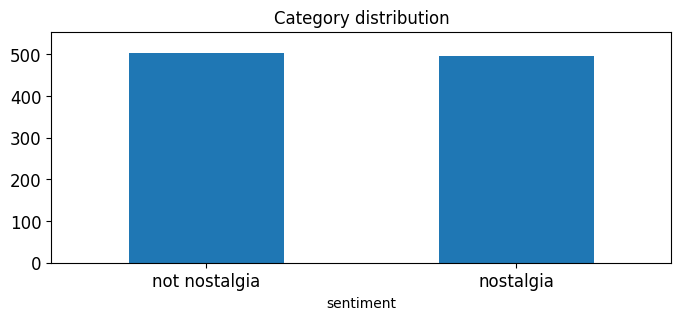

In [16]:
upper_bound = max(df_sample.sentiment.value_counts() + 50)
print(df_sample.sentiment.value_counts())

# plot barchart for X_sample
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Exercise 8

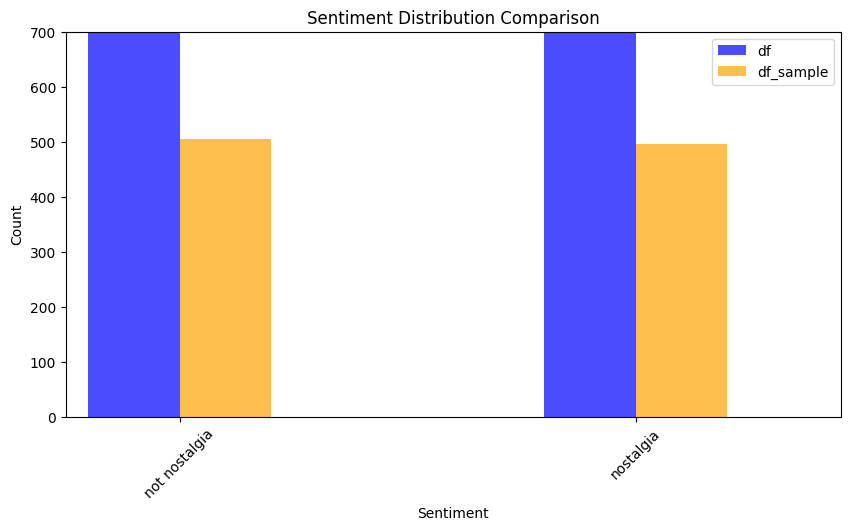

In [17]:
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# Align the two datasets to handle cases where they have different categories
all_categories = set(df_counts.index).union(set(df_sample_counts.index))
df_counts = df_counts.reindex(all_categories, fill_value=0)
df_sample_counts = df_sample_counts.reindex(all_categories, fill_value=0)

# Plot the combined bar chart
plt.figure(figsize=(10, 5))
df_counts.plot(kind='bar', color='blue', alpha=0.7, label='df', width=0.2, position=1)
df_sample_counts.plot(kind='bar', color='orange', alpha=0.7, label='df_sample', width=0.2, position=0)

# Customize plot
plt.title('Sentiment Distribution Comparison')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim([0, 700])  # Adjust as needed based on your data range
plt.legend()
plt.xticks(rotation=45)
plt.show()


Feature Creation

In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
print(df[0:4]["unigrams"])
df[0:4]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object


,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


Exercise 9

In [21]:
analyze = count_vect.build_analyzer()
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [22]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

Exercise 10

In [23]:
print(df_counts[0:5, 0:100].toarray())
for i in range(100):
    num = df_counts[3:4, i:i+1].toarray()
    if bool(num == 1):
        print(num)
        word = count_vect.get_feature_names_out()[i]
        print(word)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [24]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

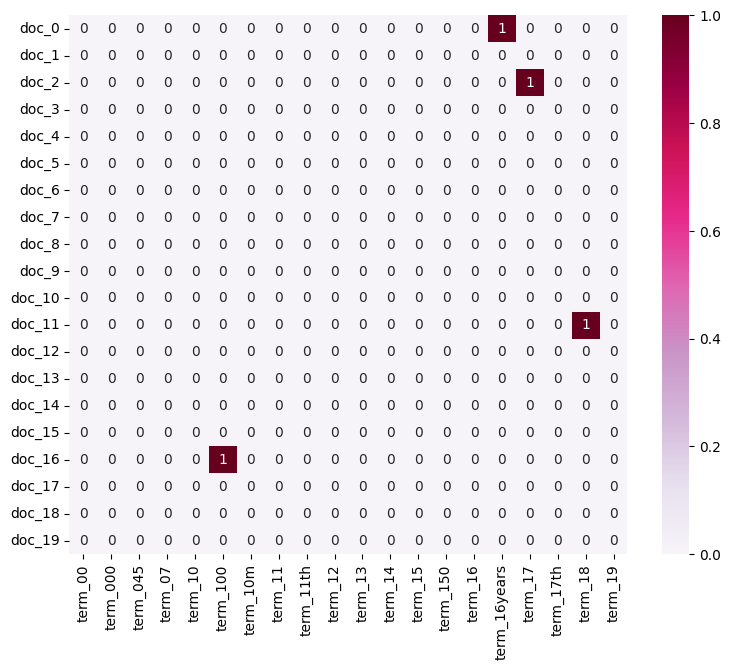

In [25]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Exercise 11

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11603 stored elements and shape (1498, 40)>
  Coords	Values
  (0, 9)	1
  (0, 34)	2
  (0, 37)	1
  (0, 29)	1
  (0, 16)	1
  (0, 33)	1
  (0, 0)	2
  (0, 30)	3
  (0, 32)	2
  (0, 7)	1
  (0, 21)	1
  (0, 11)	1
  (0, 1)	2
  (0, 35)	1
  (0, 8)	1
  (0, 5)	1
  (0, 6)	2
  (0, 39)	2
  (1, 34)	1
  (1, 16)	1
  (1, 33)	1
  (1, 30)	2
  (1, 21)	1
  (1, 1)	1
  (1, 4)	1
  :	:
  (1495, 27)	1
  (1495, 19)	1
  (1496, 9)	1
  (1496, 34)	2
  (1496, 16)	1
  (1496, 33)	2
  (1496, 30)	1
  (1496, 21)	3
  (1496, 11)	2
  (1496, 1)	3
  (1496, 8)	1
  (1496, 20)	2
  (1496, 13)	1
  (1496, 38)	1
  (1496, 31)	1
  (1496, 2)	1
  (1496, 19)	1
  (1497, 16)	1
  (1497, 30)	2
  (1497, 11)	2
  (1497, 20)	2
  (1497, 12)	1
  (1497, 38)	2
  (1497, 31)	3
  (1497, 27)	2


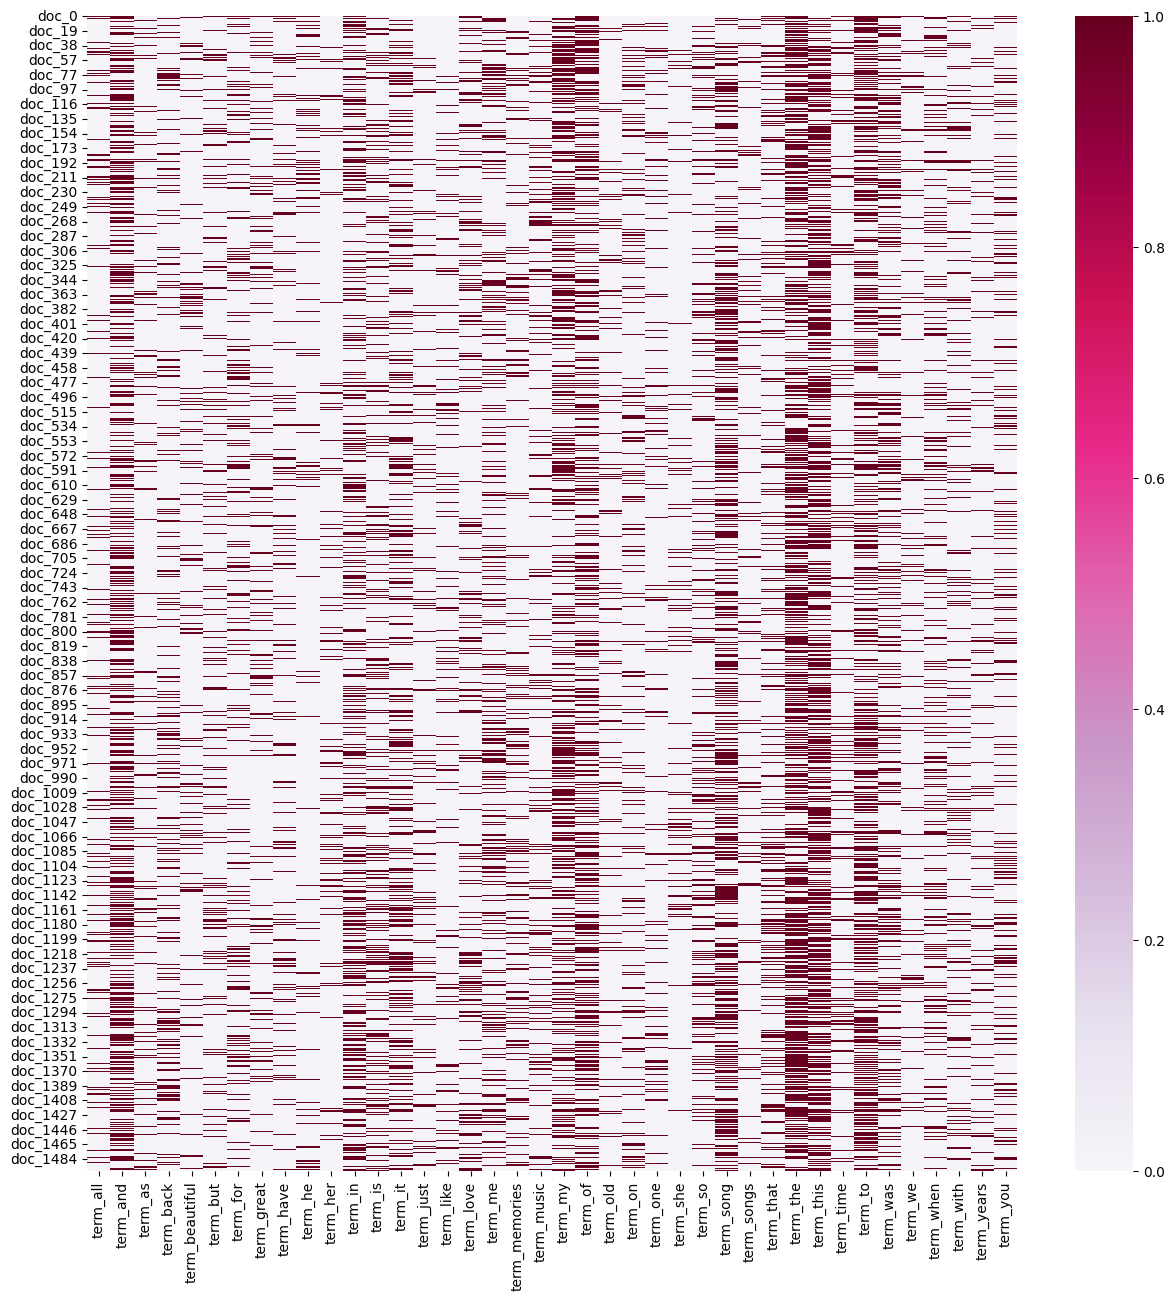

In [26]:
count_vect = CountVectorizer(max_features=40)
df_counts = count_vect.fit_transform(df['comment'])
print(df_counts)

selected = None
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:selected]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:selected]]
plot_z = df_counts[0:selected, 0:selected].toarray() #X_counts[how many documents, how many terms]
plot_z

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

Attribute Transformation / Aggregation

In [27]:
count_vect = CountVectorizer(max_features=300)      #增加特徵數量
df_counts = count_vect.fit_transform(df['comment'])

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

np.int64(25)

C:\Users\cho\AppData\Local\Temp\ipykernel_21284\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


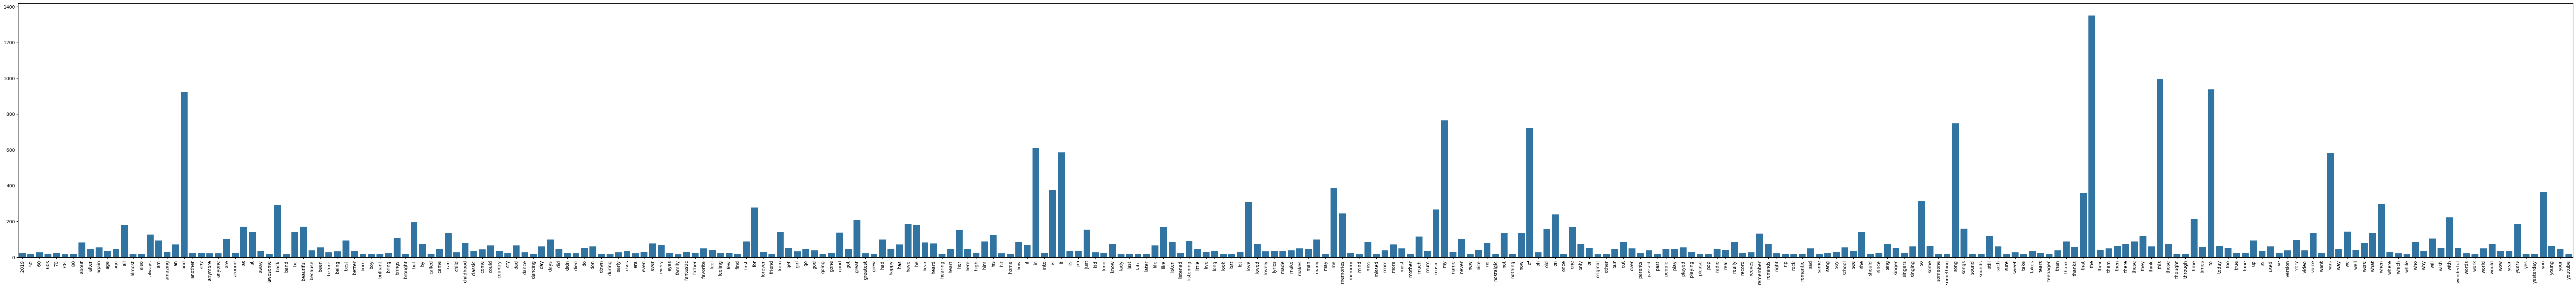

In [28]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Exercise 12

In [29]:
import plotly.express as px
X = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies[:300]})

# Plotly
fig = px.bar(X, x='Term', y='Frequency')


# 顯示互動式圖表
fig.show()

Exercise 13

In [30]:
import plotly.express as px
freq = 100

# 計算每個詞的出現總頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 創建詞頻的 DataFrame
X = pd.DataFrame({'Term': count_vect.get_feature_names_out()[0:], 'Frequency': term_frequencies[0:]})

X['Top'] = X['Frequency'].rank(method='min', ascending=False) <= freq
df_top = X[X['Top']]


# 使用 Plotly 繪製條形圖
fig = px.bar(df_top, x='Term', y='Frequency', title=f"Top {freq} Terms by Frequency")
fig.update_traces(width=0.5)
fig.show()

Exercise 14

In [31]:
# 計算每個詞的出現總頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 創建詞頻的 DataFrame
X = pd.DataFrame({'Term': count_vect.get_feature_names_out()[0:], 'Frequency': term_frequencies[0:]})

df_top = X.nlargest(freq, 'Frequency')

fig = px.bar(df_top, x='Term', y='Frequency', title=f"Top {freq} Terms by Frequency")
fig.update_traces(width=0.5)
fig.show()

Exercise 15

C:\Users\cho\AppData\Local\Temp\ipykernel_21284\2426724564.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



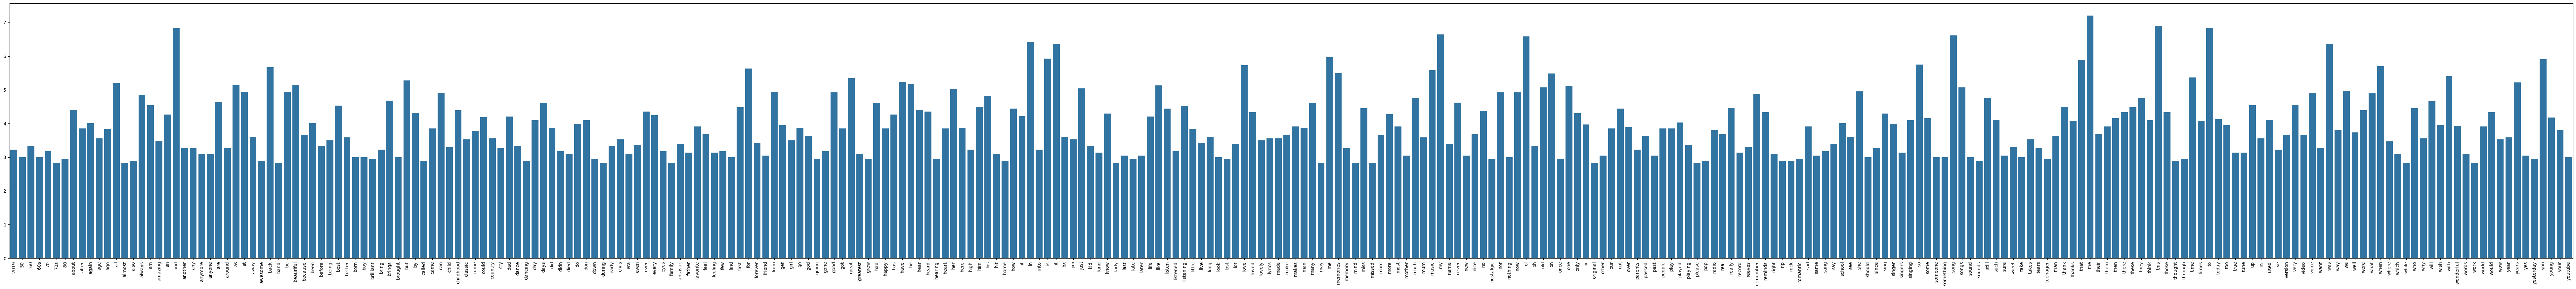

In [32]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [33]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 創建詞頻的 DataFrame
X = pd.DataFrame({'Term': count_vect.get_feature_names_out()[0:], 'Frequency': term_frequencies_log[0:]})

df_top = X.nlargest(freq, 'Frequency')

# df['Top'] = df['Frequency'].rank(method='min', ascending=False) <= 100
# df_top = df[df['Top']]


# 使用 Plotly 繪製條形圖
fig = px.bar(df_top, x='Term', y='Frequency', title=f"Top {freq} Terms by Frequency")
fig.update_traces(width=0.5)
fig.show()
print("將出現頻率取log之後，會使整體趨勢平滑非常多，使得低頻數值相對變大，結果比較看的到低頻的數據，而不是全都高頻的數據")

將出現頻率取log之後，會使整體趨勢平滑非常多，使得低頻數值相對變大，結果比較看的到低頻的數據，而不是全都高頻的數據


Finding frequent patterns

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = df['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [35]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Sentimant {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentimant not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


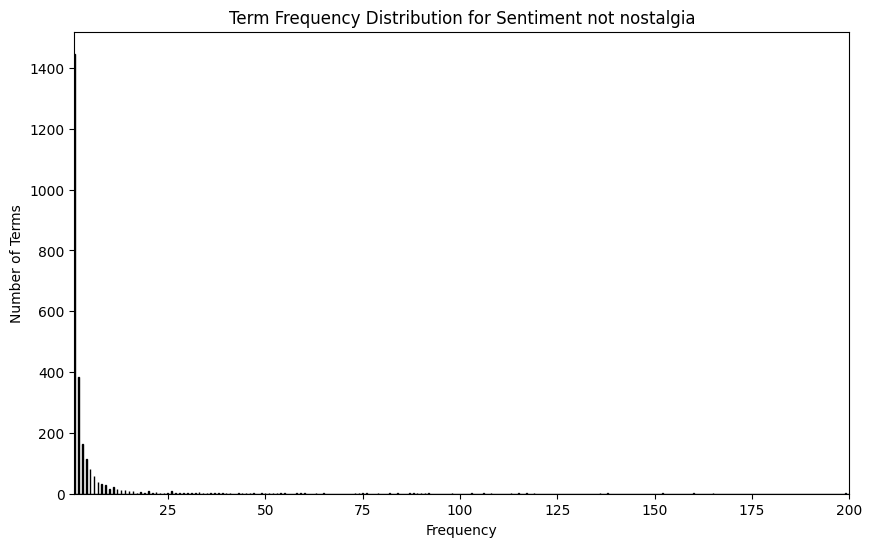

In [36]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [37]:
# 前 5% 詞的頻率
sentiment_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [38]:
# 前 1% 詞的頻率
sentiment_number = 1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_1_percent_index = int(0.01 * total_terms)

# Get the indices of the top 1% most frequent terms
top_1_percent_indices = sorted_indices[:top_1_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 1%: {top_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: nostalgia
Number of terms in top 1%: 22
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [39]:
# 前 1% 詞的頻率
sentiment_number = 0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_1_percent_index = int(0.01 * total_terms)

# Get the indices of the top 1% most frequent terms
top_1_percent_indices = sorted_indices[:top_1_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 1%: {top_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: not nostalgia
Number of terms in top 1%: 26
Filtered terms: ['shared', 'machine', 'shots', 'sincerely', 'april', 'reminds', 'strickly', 'melt', 'hates', 'henderson', 'lee', 'baritone', 'levis', 'super', 'relationships', 'that', 'shape', 'message', 'jr', 'excuse', 'simmons', 'they', 'parts', 'men', 'talking', 'height', 'lowest', 'fresh', 'briefly', 'stumble', 'beings', 'auto', 'anything', 'measure', 'btw', 'curios', 'awakened', 'floaty', 'lived', 'reminiscing', 'cigarette', 'pavillion', 'granddaughter', 'failing', 'rock', 'hope', 'god', 'appear', 'glitter', 'puts', 'europe', 'crap', 'gen', 'lane', 'lover', 'introduction', 'greats', 'soundtracks', 'interested', 'judging', 'special', 'predicting', 'suggestive', 'appearances', 'shoulder', 'met', 'standard', 'stealing', 'before', 'great', 'drums', 'simplistic', 'march', 'ship', 'gone', 'by', 'intoxicating', 'meaningful', 'thing', 'sun', 'naturally', 'bizarre', 'ships', 'attack', 'golden', 'mind', 'rebellious', 'shady', 'intelligi

In [40]:
sentiment_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
classic     23
wish        24
any         25
          ... 
of         361
to         394
this       451
and        451
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1

,00,000,045,10,100,10m,11,14,15,150,...,young,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exercise 16

In [41]:
print("這個資料集的結果和Master其實不太一樣，因為是評論的關係，所以沒有太大差別。")
print("但在類別1中可以發現代名詞(你我他)和介係詞的數量較多，類別0責打多數是名詞和副詞。")

這個資料集的結果和Master其實不太一樣，因為是評論的關係，所以沒有太大差別。
但在類別1中可以發現代名詞(你我他)和介係詞的數量較多，類別0責打多數是名詞和副詞。


In [42]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    # obj = DF2DB(term_document_dfs[sentiment])            
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


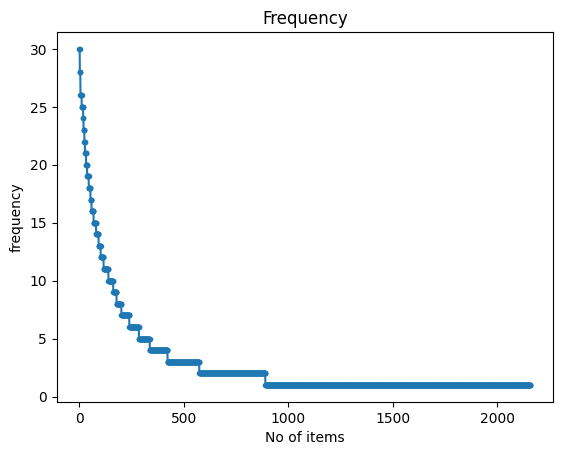

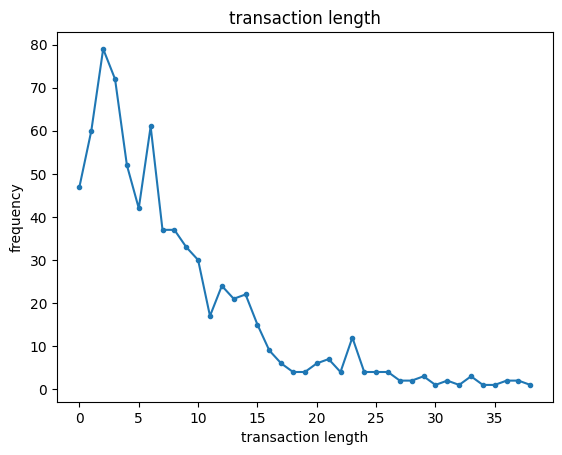

In [43]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.966526146738824
Variance in Transaction Sizes : 35.64728296168002
Sparsity : 0.9965636266853979


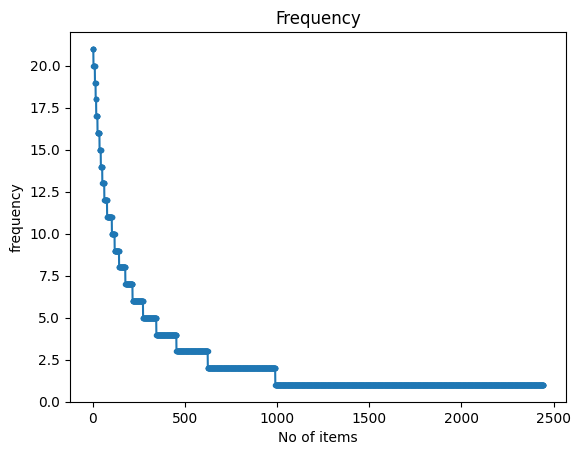

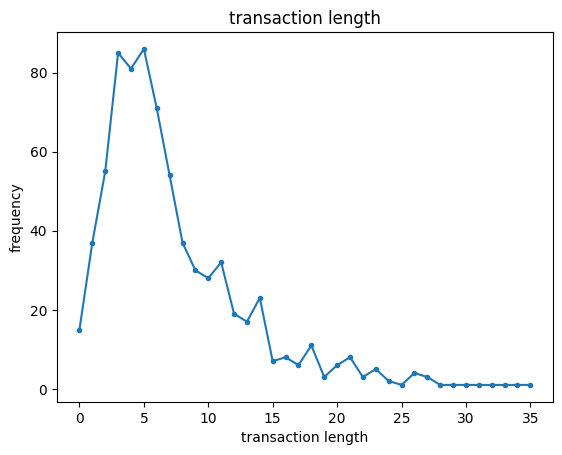

In [44]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [45]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.006000995635986328


In [46]:
obj1.save('frequentPatternsDF_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


In [47]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.0060002803802490234


In [48]:
obj1.save('frequentPatternsDF_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,elvis,21
140,every,21
141,loved,21
142,them,21


In [49]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for ndf in dfs:
    for pattern in ndf['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(ndf) for ndf in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for ndf in dfs:
    filtered_df = ndf[ndf['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [50]:
# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # df['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
from PAMI.frequentPattern.topk import FAE as fa
top_k_values = [100, 200, 500]      # 因為500, 1000, 1500分不出來所以改成100, 200, 500
fae_results = {}

for k in top_k_values:
    fae_obj = fa.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    fae_obj.mine()
    fae_results[k] = fae_obj.getPatternsAsDataFrame()
    print(f"FAE Top-K with k={k} produced {len(fae_results[k])} patterns in {fae_obj.getRuntime()} seconds")

print("\n FAE Top-K vs MaxFPGrowth：")
for k in top_k_values:
    print(f"\nFAE Top-K (k={k}):")
    print(fae_results[k])

from PAMI.frequentPattern.maximal import MaxFPGrowth as ma
support_values = [3, 6, 9]
maxfp_results = {}

for minSup in support_values:
    maxfp = ma.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
    maxfp.mine()
    maxfp_results[minSup] = maxfp.getPatternsAsDataFrame()
    print(f"MaxFPGrowth with minSup={minSup} produced {len(maxfp_results[minSup])} patterns in {maxfp.getRuntime()} seconds")

for minSup in support_values:
    print(f"\nMaxFPGrowth (minSup={minSup}):")
    print(maxfp_results[minSup])

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=100 produced 100 patterns in 0.007000923156738281 seconds
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=200 produced 200 patterns in 0.009999275207519531 seconds
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=500 produced 500 patterns in 0.04899954795837402 seconds

 FAE Top-K vs MaxFPGrowth：

FAE Top-K (k=100):
    Patterns  Support
0      takes       30
1   favorite       30
2       ever       28
3      would       28
4         go       28
..       ...      ...
95     while       13
96      last       13
97        10       13
98      eyes       13
99    lyrics       13

[100 rows x 2 columns]

FAE Top-K (k=200):
     Patterns  Support
0       takes       30
1    favorite       30
2        ever       28
3       would       28
4          go       28
..        ...      ...
195      mind        8
196   another    

Dimensionality Reduction

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

print(tdm_df)

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0  

c:\python\dataMininig\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [53]:
print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(1498, 2)
(1498, 2)
(1498, 2)


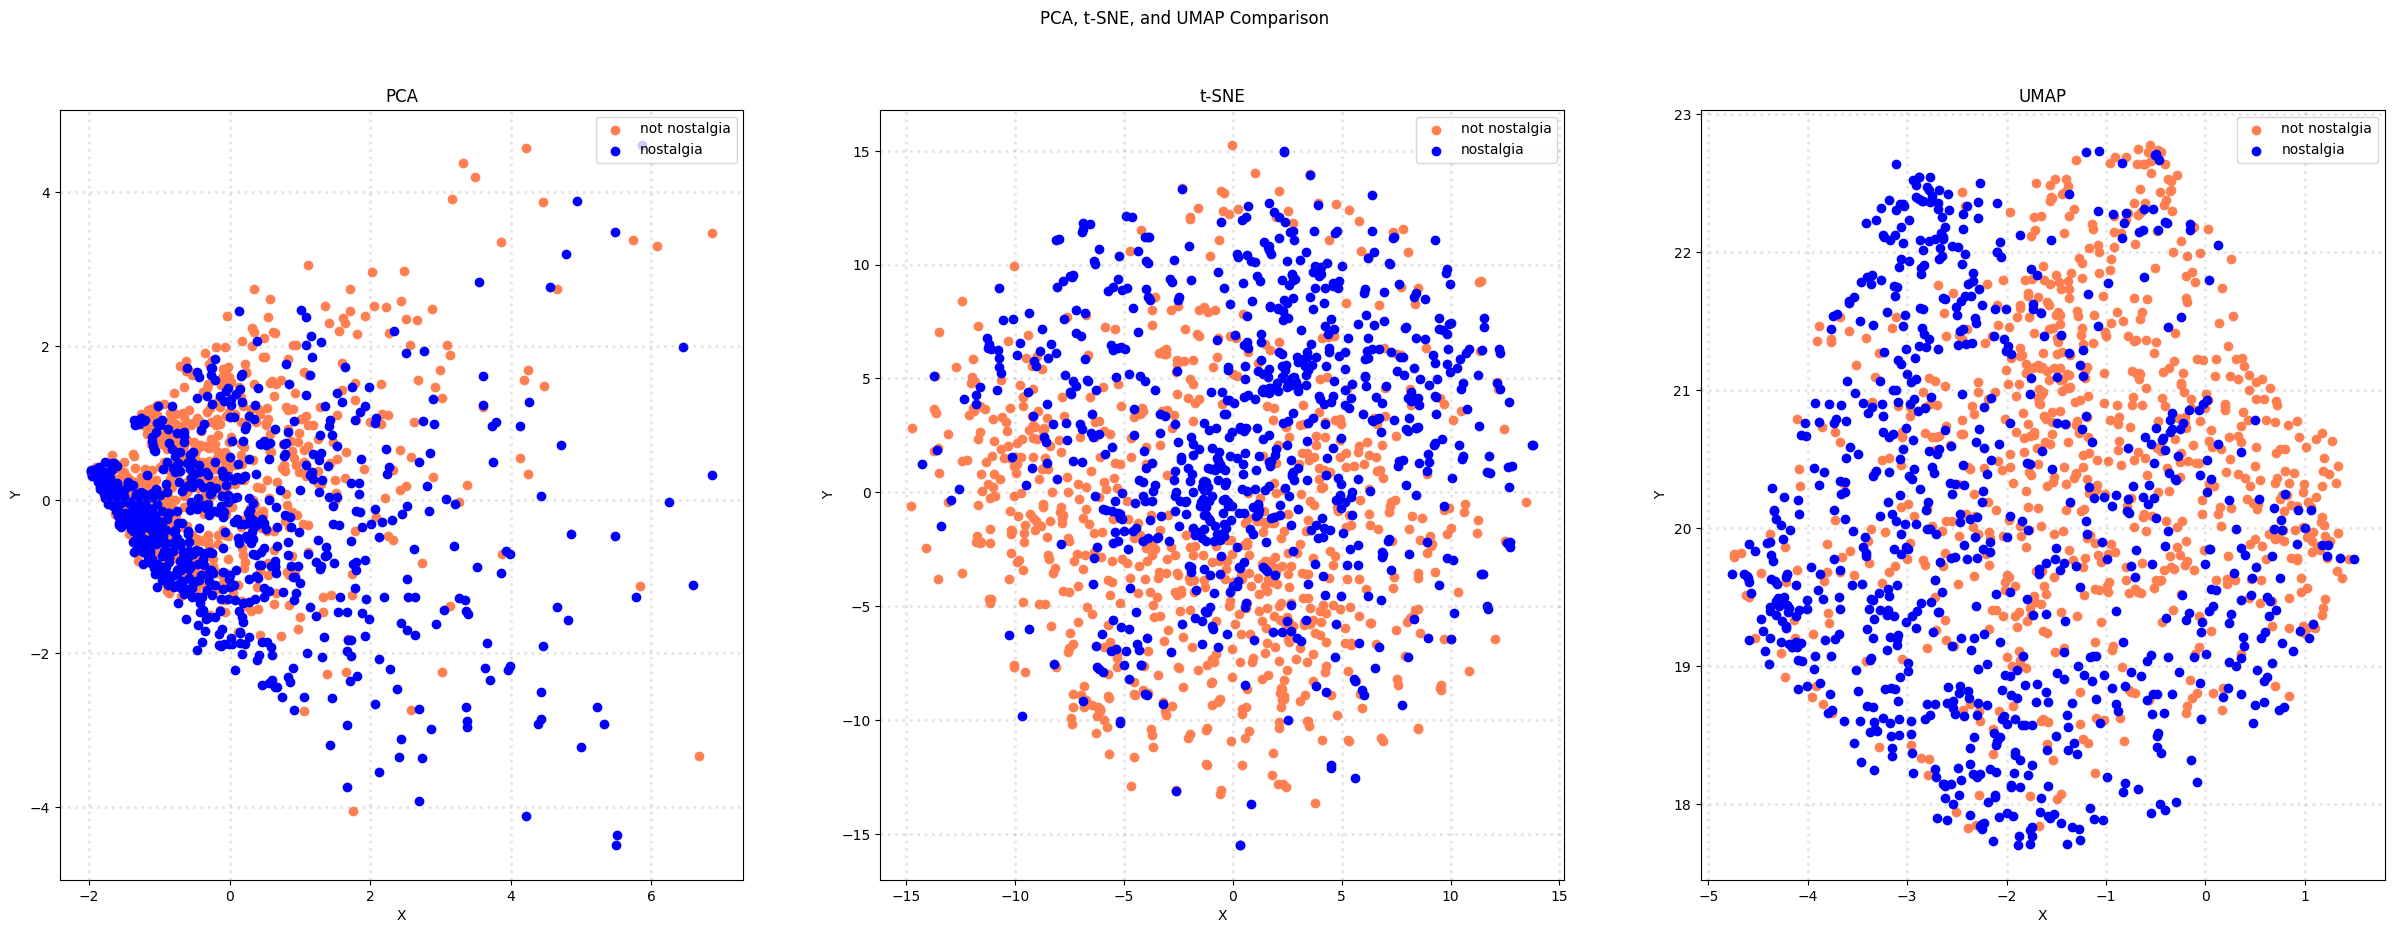

In [54]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[df['sentiment'] == sentiment].T[0]
        ys = X_reduced[df['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [55]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

c:\python\dataMininig\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



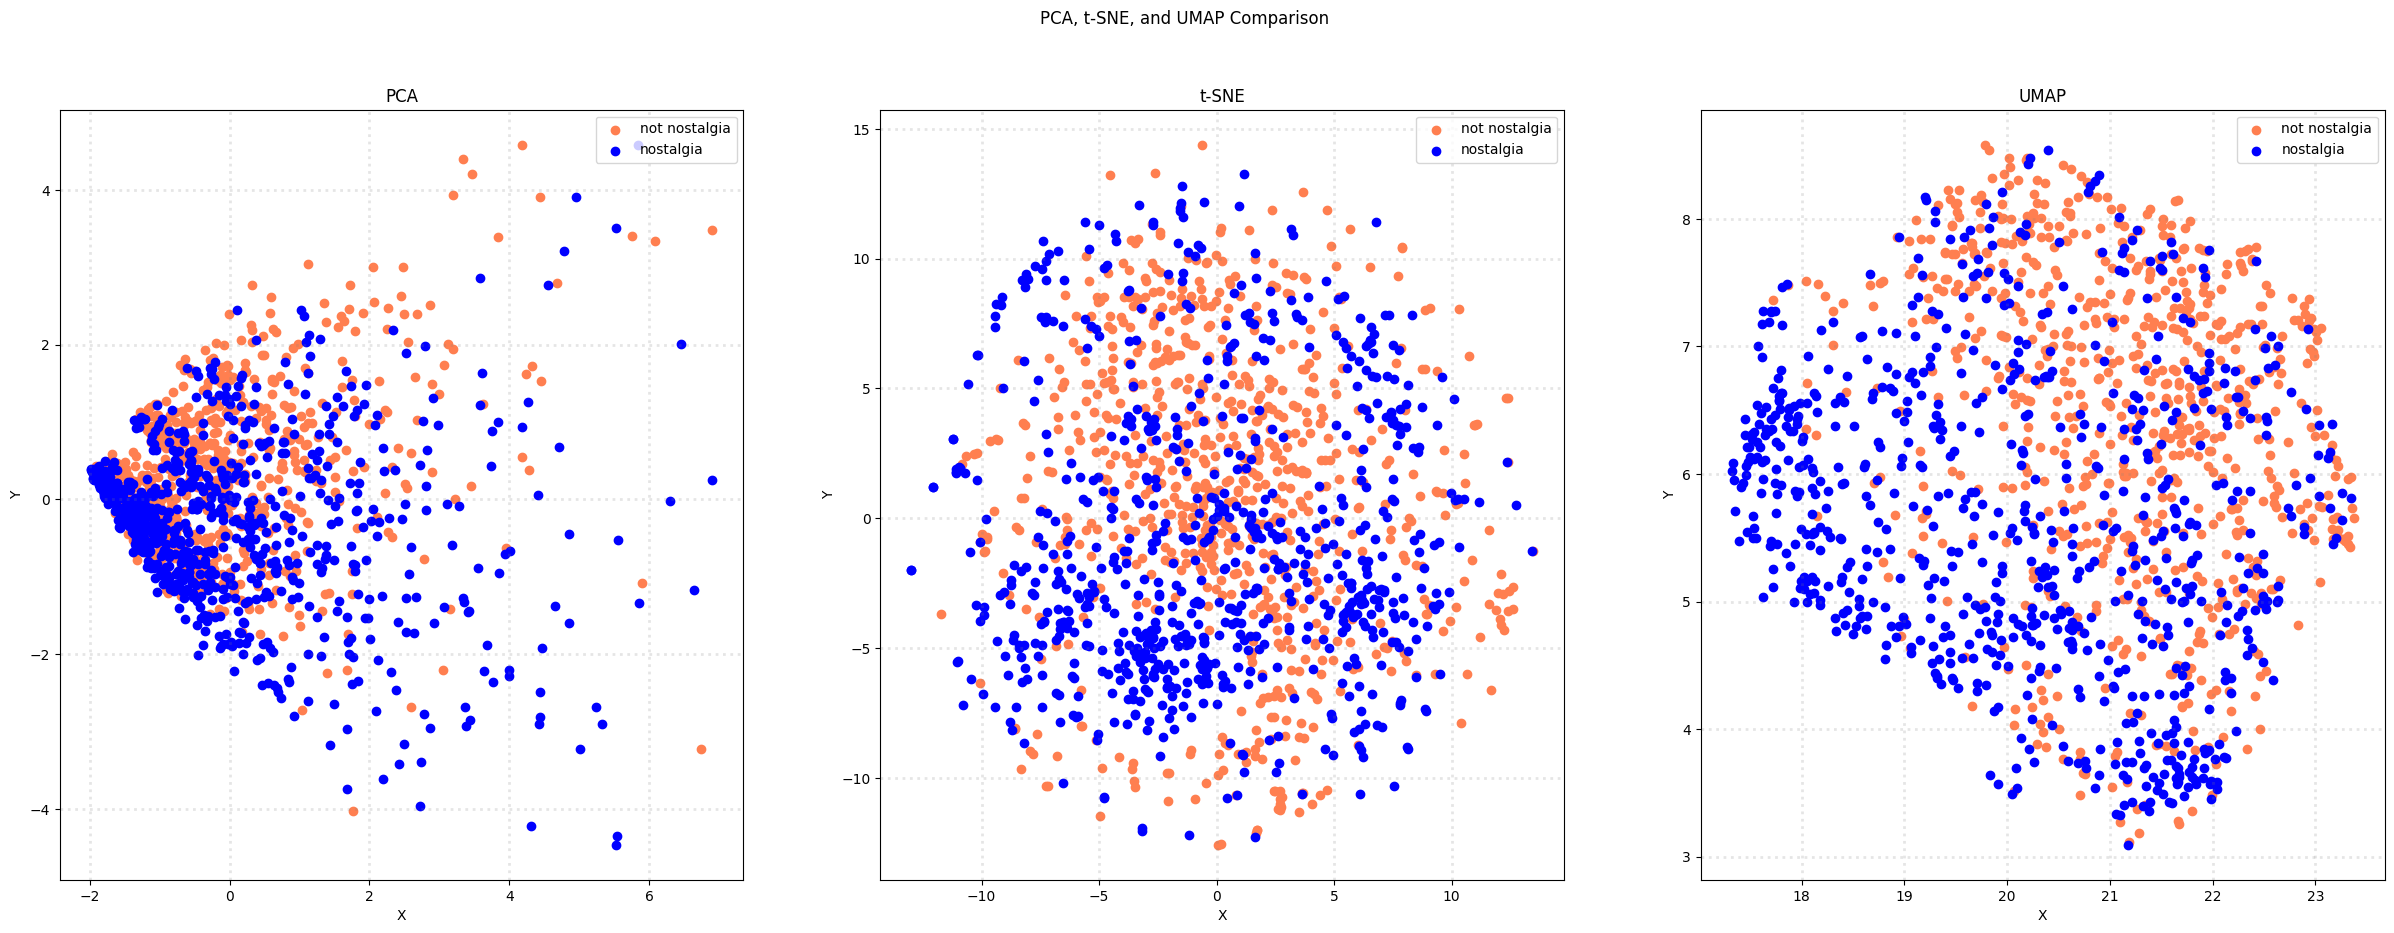

In [56]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, sentiments):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

Exercise 18

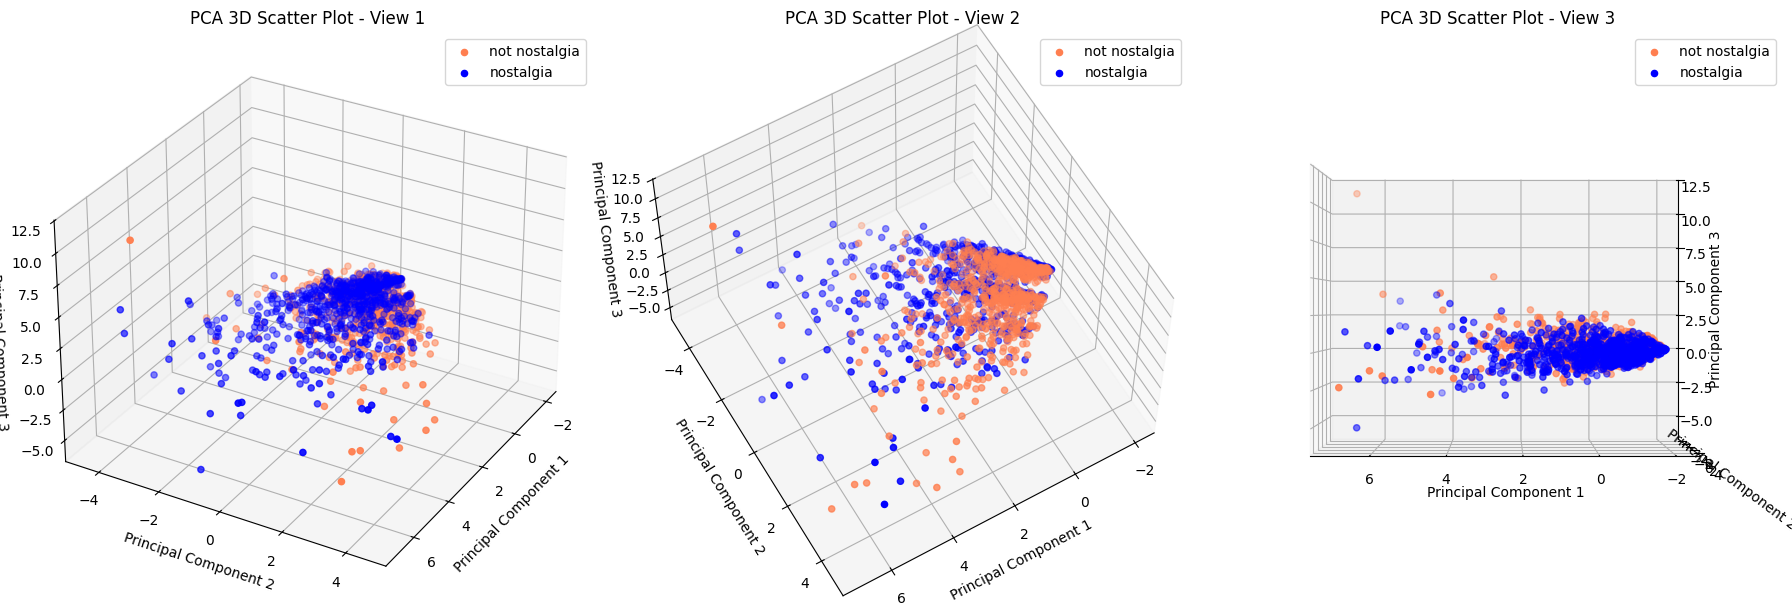

由三張圖可以看出若是PCA結果投影在不同平面結果會不一樣，而最終結果是第一張圖的俯視的結果。


In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 使用 PCA 降维到 3D
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)

fig = plt.figure(figsize=(18, 6))

# 不同視角
view_angles = [(30, 30), (60, 60), (90, 0)]  # (azimuth, elevation)

# 三張圖
for i, (azim, elev) in enumerate(view_angles):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    
    # 畫點
    for sentiment, color in zip(sentiments, col):
        ax.scatter(X_pca_aug[df['sentiment'] == sentiment, 0], 
                   X_pca_aug[df['sentiment'] == sentiment, 1], 
                   X_pca_aug[df['sentiment'] == sentiment, 2], 
                   c=color, label=sentiment)

    ax.set_title(f'PCA 3D Scatter Plot - View {i + 1}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.view_init(elev=elev, azim=azim)  # 視角
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
print("由三張圖可以看出若是PCA結果投影在不同平面結果會不一樣，而最終結果是第一張圖的俯視的結果。")

Discretization and Binarization

In [58]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [59]:
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()

In [60]:
df[0:9]

,sentiment,comment,unigrams,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{with, a, now,, age, can, life., still, loving...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{a, angel, him, still, singing, an, beautiful,...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{with, Mr., a, gentle, age, sweet,, find, comf...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{from, day, years, a, served, can, that, be, r...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{me, mum, my, listening, of, songs, him, who, ...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{a, fear, song., your, still, funerals., touch...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{a, 70's, listening, then,, back, it, to, the,...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{with, a, childhood, to, the, feeling, ALSO, l...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{in, my, always, heart, you, are, Wherever}",[1]


Exercise 19

In [61]:
# 因為我的資料原本就是以名詞作為標籤，因此此處我將標籤轉為數字測試
sentiment_name = ['not nostalgia','nostalgia']
df['sentiment_num'] = [0 if s == sentiment_name[0] else 1 for s in df['sentiment']]
df

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment_num)
df['bin_sentiment'] = mlb.transform(df['sentiment_num']).tolist()
print(df[0:9])

       sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [liste

Data Exploration

In [62]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [63]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [64]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\cho\AppData\Local\Temp\ipykernel_21284\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\cho\AppData\Local\Temp\ipykernel_21284\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\cho\AppData\Local\Temp\ipykernel_21284\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\cho\AppData\Local\Temp\ipykernel_21284\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar i

Data Classification

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(df[['sentiment_num', 'sentiment']].drop_duplicates().values)       # sentiment才是數字，須將字串(sentiment)放在後面

# Convert the numerical sentiment labels to comment labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [84]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8286    0.9486    0.8845       214
    nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [88]:
#Model with the augmented data
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [89]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8711111111111111

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8250    0.9252    0.8722       214
    nostalgia     0.9238    0.8220    0.8700       236

     accuracy                         0.8711       450
    macro avg     0.8744    0.8736    0.8711       450
 weighted avg     0.8768    0.8711    0.8710       450

